# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [41]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(20)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [9]:
#Seu código aqui para a média
df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal', ascending=False)


,Categoria,Preco_Normal
1,comidas-preparadas,3095.043478
5,lacteos,2385.219239
2,congelados,2108.042553
0,belleza-y-cuidado-personal,1783.556485
3,frutas,1724.473684
6,verduras,1343.296875
4,instantaneos-y-sopas,765.491228


In [12]:
#Seu código aqui para a mediana
df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
1,comidas-preparadas,3290.0
0,belleza-y-cuidado-personal,1569.0
2,congelados,1519.0
3,frutas,1195.0
6,verduras,1180.0
5,lacteos,989.0
4,instantaneos-y-sopas,439.0


Digite aqui as categorias:
A categoria que possue uma media e mediana acima do normal é comidas-preparadas 
A categoria que possua uma media e mediana abaixo do normal é instantaneos-y-sopas

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [17]:
#Seu código aqui
desvio_por_categoria_produto = df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by='Preco_Normal', ascending=False)
desvio_por_categoria_produto

,Categoria,Preco_Normal
5,lacteos,3925.816164
0,belleza-y-cuidado-personal,2210.041719
2,congelados,2111.539896
1,comidas-preparadas,2019.911428
3,frutas,1639.151114
4,instantaneos-y-sopas,1170.232869
6,verduras,1012.699625


Digite nesse campo o comportamento que você identificou.
Podemos identificar que a média sofre forte influência de outlier puxando a média para cima, e na mediana podemos reparar que em categórias com grande variabilidade ela é mais robusta e representativa.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

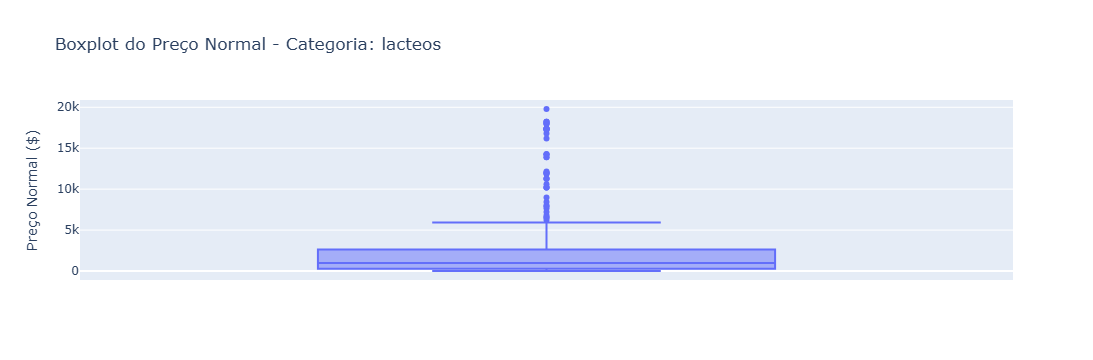

In [42]:
#Seu código aqui
#identificando a categoria com maior desvio
categoria_maior_desvio = desvio_por_categoria_produto.idxmax()
valor_desvio = desvio_por_categoria_produto.max()

# 1. Calculando o desvio padrão por categoria novamente
# Usamos ['Preco_Normal'] para garantir que estamos operando sobre a coluna correta
desvio_por_categoria_produto = df.groupby('Categoria')['Preco_Normal'].std()

# 2. Pegando o NOME da categoria com maior desvio (retorna uma string)
categoria_maior_desvio = desvio_por_categoria_produto.idxmax()

# 3. Filtrando o DataFrame original
# Agora a comparação é: df['Categoria'] == "nome_da_categoria"
df_categoria = df.loc[df['Categoria'] == categoria_maior_desvio].copy()

# 4. Criando o gráfico
fig = px.box(df_categoria,
             y='Preco_Normal',
             title=f'Boxplot do Preço Normal - Categoria: {categoria_maior_desvio}',
             points='outliers',
             labels={'Preco_Normal': 'Preço Normal ($)'})

fig.show()

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

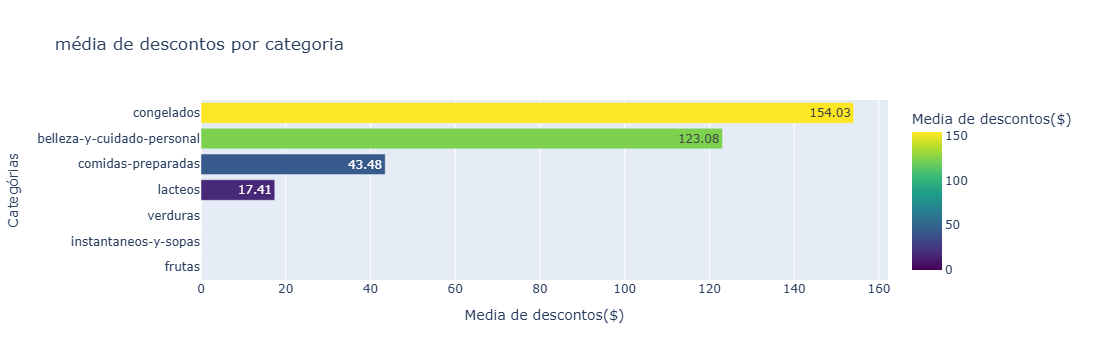

In [40]:
# Seu código aqui
desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean().reset_index()
desconto_por_categoria

# Ordenando os valores para que a barra maior fique no topo (melhora a leitura)
desconto_por_categoria = desconto_por_categoria.sort_values(by='Desconto', ascending=True)

fig = px.bar(desconto_por_categoria,x='Desconto', y='Categoria', orientation ='h',
            title='média de descontos por categoria',
            text_auto='.2f',  # Adiciona o valor médio dentro ou ao lado das barras
            color='Desconto', # Adiciona uma escala de cor baseada no valor
            labels={'Categoria':'Categórias', 'Desconto':'Media de descontos($)'},color_continuous_scale='Viridis')

fig.show()             

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

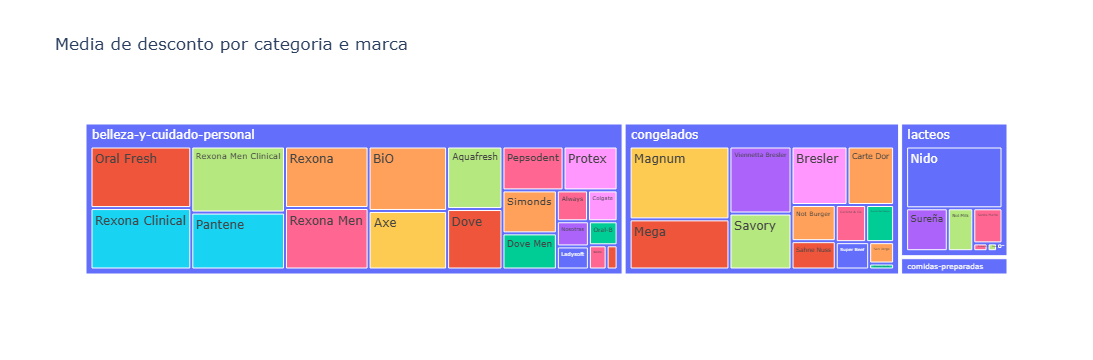

In [44]:
# Seu código aqui
categoria_e_marca = df.groupby(['Categoria', 'Marca'],as_index=False)['Desconto'].mean()

fig = px.treemap(categoria_e_marca,path=['Categoria', 'Marca'],
                 values='Desconto',
                 title='Media de desconto por categoria e marca',
                 color='Marca')

fig.show()